#**Informe de Análisis Predictivo de Cancelación de Servicios**#

Objetivo del proyecto:
Desarrollar un modelo predictivo que identifique a los clientes con mayor probabilidad de cancelar sus servicios, con el fin de diseñar estrategias preventivas y mejorar la retención.

1. Proceso realizado

Limpieza y preparación de datos

Eliminación de valores nulos y conversión de variables categóricas en variables numéricas mediante codificación.

Normalización de las variables numéricas para modelos sensibles a escala.

Eliminación de multicolinealidad mediante análisis VIF, conservando solo las variables relevantes.

Balanceo de clases

Se aplicó SMOTE para equilibrar la proporción de clientes que cancelan (1) y los que no cancelan (0), evitando sesgos en el entrenamiento.

División del dataset

Entrenamiento (56%), Validación (14%), Prueba (30%).

Uso de KFold (5 folds) para validar consistencia del modelo.

Entrenamiento de modelos

Se evaluaron 4 modelos:

Regresión Logística

Árbol de Decisión

Random Forest

XGBoost

Evaluación

Métricas: Accuracy, Precision, Recall, F1-Score, ROC-AUC, Average Precision.

Comparación en validación y prueba para evitar sobreajuste.

2. Comparativa de modelos

| Modelo                  | Accuracy Test | Precision | Recall    | F1-Score  | ROC-AUC   |
| ----------------------- | ------------- | --------- | --------- | --------- | --------- |
| **Regresión Logística** | 0.725         | 0.490     | **0.800** | **0.608** | **0.823** |
| Random Forest           | **0.776**     | **0.618** | 0.415     | 0.497     | 0.816     |
| Árbol de Decisión       | 0.761         | 0.566     | 0.433     | 0.491     | 0.805     |
| XGBoost                 | 0.745         | 0.524     | 0.446     | 0.482     | 0.772     |

📌 Conclusiones del rendimiento:

Regresión Logística destaca por su Recall alto (0.800) y buen ROC-AUC, lo que indica que es el mejor para detectar la mayoría de los clientes que cancelarán.

Random Forest obtiene mejor Precision, pero sacrifica Recall, lo que implica que dejaría pasar más casos de cancelación sin detectar.

XGBoost y Árbol de Decisión presentan rendimiento intermedio.

💡 Modelo seleccionado: Regresión Logística por su capacidad predictiva equilibrada y alto Recall, clave para prevención.

3. Factores más influyentes en la cancelación

Del análisis de importancia de variables y coeficientes del modelo, los factores más relevantes son:

Meses de Contrato → Contratos más cortos presentan mayor probabilidad de cancelación.

Tipo de Contrato Mensual → Clientes con contrato mensual muestran tasas de cancelación más altas.

Cargos Mensuales Altos → Precios elevados se correlacionan con mayor evasión.

Falta de Servicios Adicionales → Ausencia de servicios como seguridad en línea o soporte técnico incrementa el riesgo de fuga.

Método de Pago → Pago con tarjeta de crédito o transferencias muestra diferente retención frente a débito automático.

Uso de Internet por Fibra Óptica → Algunos perfiles de clientes de fibra óptica presentan más cancelaciones, posiblemente por competencia.

4. Estrategias de retención propuestas

En base a los resultados obtenidos, se sugieren las siguientes acciones:

Incentivos para contratos a largo plazo.

Descuentos o beneficios para quienes pasen de contrato mensual a anual.

Bonificaciones progresivas por permanencia.

Segmentación de clientes en riesgo.

Usar el modelo para identificar mensualmente clientes con alta probabilidad de cancelar.

Implementar campañas personalizadas antes del vencimiento del contrato.

Revisión de la política de precios.

Analizar competitividad de tarifas en clientes con cargos mensuales altos.

Ofrecer planes escalonados según el uso y presupuesto.

Paquetes de servicios adicionales.

Promocionar servicios complementarios (seguridad en línea, soporte técnico) como valor agregado.

Ofrecer pruebas gratuitas por un tiempo limitado.

Optimizar la experiencia de clientes de fibra óptica.

Identificar problemas técnicos o de atención en ese segmento.

Mejorar calidad y comunicación del servicio.

5. Conclusión final

La Regresión Logística es el modelo óptimo para el objetivo de este proyecto, ya que maximiza la detección de clientes en riesgo, permitiendo implementar acciones preventivas efectivas.
Con su uso, la empresa podrá actuar proactivamente, reduciendo la tasa de cancelación y mejorando la fidelización.

Se recomienda la integración del modelo en un sistema de monitoreo continuo, actualizando predicciones y estrategias en función de datos recientes.

#Cargar de Librerias#

In [4]:
import subprocess
import sys

# Lista de librerías necesarias
packages = [
    "numpy", "pandas", "scikit-learn",
    "matplotlib", "seaborn", "xgboost",
    "imbalanced-learn", "shap"
]

# Instalación silenciosa con manejo de errores
for package in packages:
    try:
        subprocess.check_call([sys.executable, "-m", "pip", "install", package],
                              stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)
        print(f"✅ {package} instalado correctamente o ya existente.")
    except Exception as e:
        print(f"⚠️ No se pudo instalar {package}. Detalles: {e}")


✅ numpy instalado correctamente o ya existente.
✅ pandas instalado correctamente o ya existente.
✅ scikit-learn instalado correctamente o ya existente.
✅ matplotlib instalado correctamente o ya existente.
✅ seaborn instalado correctamente o ya existente.
✅ xgboost instalado correctamente o ya existente.
✅ imbalanced-learn instalado correctamente o ya existente.
✅ shap instalado correctamente o ya existente.


##Cargar el dataset##

In [5]:
import pandas as pd

# Lectura de archivo json date set
df = pd.read_csv('/content/telecomx_data_processed.csv')

# Asegúrate de que la columna objetivo se llame 'Evasion' y tenga 0/1 o NaN
df.columns = df.columns.str.strip()
df.head()

,ID_Cliente,Evasion,Genero,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Meses_Contrato,Servicio_Telefonico,Multiples_Lineas,Servicio_Internet,...,Proteccion_Dispositivo,Soporte_Tecnico,TV_Streaming,Peliculas_Streaming,Tipo_Contrato,Factura_Electronica,Metodo_Pago,Cargos_Mensuales,Cargos_Totales,Cuentas_Diarias
0,0002-ORFBO,0.0,Femenino,0,1,1,9,1,0,DSL,...,0,1,1,0,Un Año,1,Cheque,65.6,593.30,2.197407
1,0003-MKNFE,0.0,Masculino,0,0,0,9,1,1,DSL,...,0,0,0,1,Mensual,0,Cheque,59.9,542.40,2.008889
2,0004-TLHLJ,1.0,Masculino,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Mensual,1,Cheque-E,73.9,280.85,2.340417
3,0011-IGKFF,1.0,Masculino,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Mensual,1,Cheque-E,98.0,1237.85,3.173974
4,0013-EXCHZ,1.0,Femenino,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Mensual,1,Cheque,83.9,267.40,2.971111


In [6]:
df.shape

(7256, 22)

## Verificar la Columna Evasión##

In [7]:
df.shape
df['Evasion'].value_counts(dropna=False)

,count
Evasion,
0.0,5163
1.0,1869
NaN,224


##Eliminar Columna Irrelevante-ID_Cliente##

In [8]:
cols_drop = ['ID_Cliente']  # Elimina  columnas irrelevantes
df = df.drop(columns=[c for c in cols_drop if c in df.columns])
df.head()

,Evasion,Genero,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Meses_Contrato,Servicio_Telefonico,Multiples_Lineas,Servicio_Internet,Seguridad_En_Linea,...,Proteccion_Dispositivo,Soporte_Tecnico,TV_Streaming,Peliculas_Streaming,Tipo_Contrato,Factura_Electronica,Metodo_Pago,Cargos_Mensuales,Cargos_Totales,Cuentas_Diarias
0,0.0,Femenino,0,1,1,9,1,0,DSL,0,...,0,1,1,0,Un Año,1,Cheque,65.6,593.30,2.197407
1,0.0,Masculino,0,0,0,9,1,1,DSL,0,...,0,0,0,1,Mensual,0,Cheque,59.9,542.40,2.008889
2,1.0,Masculino,0,0,0,4,1,0,Fiber optic,0,...,1,0,0,0,Mensual,1,Cheque-E,73.9,280.85,2.340417
3,1.0,Masculino,1,1,0,13,1,0,Fiber optic,0,...,1,0,1,1,Mensual,1,Cheque-E,98.0,1237.85,3.173974
4,1.0,Femenino,1,1,0,3,1,0,Fiber optic,0,...,0,1,1,0,Mensual,1,Cheque,83.9,267.40,2.971111


#Análisis de correlación y relación con Evasion#

##Matriz de correlación##

##Correlación entre variables numéricas##

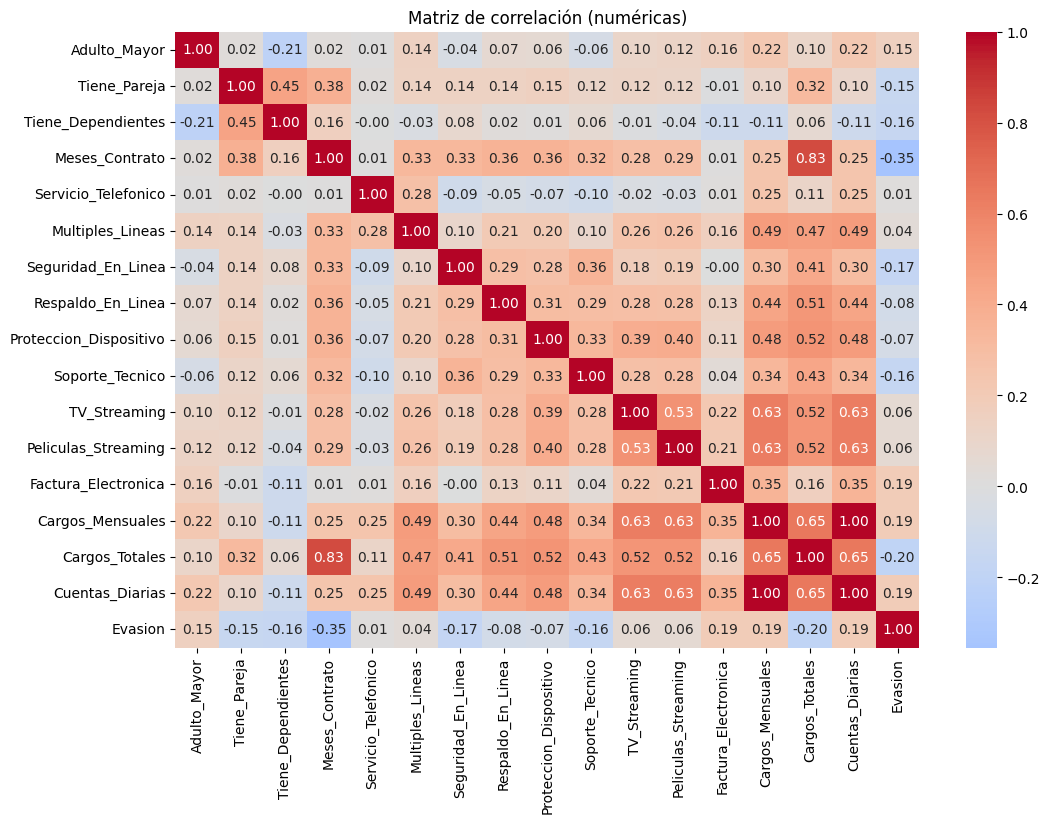

In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
# quitar target si está dentro
if 'Evasion' in num_cols:
    num_cols.remove('Evasion')

plt.figure(figsize=(12,8))
corr = df[num_cols + (['Evasion'] if 'Evasion' in df.columns else [])].corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Matriz de correlación (numéricas)')
plt.show()

##Correlación entre variables numéricas y Objetivo(Evasion)##

In [10]:
from scipy.stats import pointbiserialr

for col in num_cols:
    try:
        r, p = pointbiserialr(df['Evasion'].dropna().astype(float), df.loc[df['Evasion'].notnull(), col])
        print(col, 'r=', round(r,3), 'p=', round(p,3))
    except Exception as e:
        print('Error en', col, e)

Adulto_Mayor r= 0.151 p= 0.0
Tiene_Pareja r= -0.15 p= 0.0
Tiene_Dependientes r= -0.163 p= 0.0
Meses_Contrato r= -0.354 p= 0.0
Servicio_Telefonico r= 0.012 p= 0.327
Multiples_Lineas r= 0.04 p= 0.001
Seguridad_En_Linea r= -0.171 p= 0.0
Respaldo_En_Linea r= -0.082 p= 0.0
Proteccion_Dispositivo r= -0.066 p= 0.0
Soporte_Tecnico r= -0.165 p= 0.0
TV_Streaming r= 0.063 p= 0.0
Peliculas_Streaming r= 0.061 p= 0.0
Factura_Electronica r= 0.191 p= 0.0
Cargos_Mensuales r= 0.193 p= 0.0
Cargos_Totales r= -0.199 p= 0.0
Cuentas_Diarias r= 0.192 p= 0.0


##Relaciones con variables categóricas-Cramers_V##

In [11]:
import scipy.stats as ss
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()
if 'Evasion' in cat_cols: cat_cols.remove('Evasion')

for c in cat_cols:
    try:
        print(c, 'CramersV con Evasion = ', round(cramers_v(df[c].fillna('NA'),df['Evasion'].fillna('NA')),3))
    except Exception as e:
        print('Err', c, e)

Genero CramersV con Evasion =  0.0
Servicio_Internet CramersV con Evasion =  0.224
Tipo_Contrato CramersV con Evasion =  0.285
Metodo_Pago CramersV con Evasion =  0.21


##Preparación features-Variables##

###Definir y filtrar las variables que se usarán en el modelado, asegurando que solo se incluyan las que realmente existen en el DataFrame actual.###

In [12]:
# Seleccionar features
features = [
    'Genero', 'Adulto_Mayor', 'Tiene_Pareja', 'Tiene_Dependientes',
    'Meses_Contrato', 'Servicio_Telefonico', 'Multiples_Lineas',
    'Servicio_Internet', 'Seguridad_En_Linea', 'Respaldo_En_Linea',
    'Proteccion_Dispositivo', 'Soporte_Tecnico', 'TV_Streaming',
    'Peliculas_Streaming', 'Tipo_Contrato', 'Factura_Electronica',
    'Metodo_Pago', 'Cargos_Mensuales', 'Cargos_Totales', 'Cuentas_Diarias'
]
features = [f for f in features if f in df.columns]

X = df[features].copy()
y = df['Evasion'].copy()

In [13]:
mask_label = y.isin([0,1])
X_labeled = X[mask_label].reset_index(drop=True)
y_labeled = y[mask_label].astype(int).reset_index(drop=True)


#Análisis dirigido#

##Analisis de la variables en funcion a Evasion##

=== Análisis categórico: churn rate y chi2 ===

Variable: Genero


Evasion,0.0,1.0
Genero,,
Femenino,2544,939
Masculino,2619,930


Tasa de churn por nivel (ordenada):


,0
Genero,
Femenino,26.96
Masculino,26.20


Chi2 p-value: 0.490488
------------------------------------------------------------
Variable: Servicio_Internet


Evasion,0.0,1.0
Servicio_Internet,,
DSL,1957,459
Fiber optic,1799,1297
No,1407,113


Tasa de churn por nivel (ordenada):


,0
Servicio_Internet,
Fiber optic,41.89
DSL,19.00
No,7.43


Chi2 p-value: 0.0
------------------------------------------------------------
Variable: Tipo_Contrato


Evasion,0.0,1.0
Tipo_Contrato,,
Dos Años,1637,48
Mensual,2220,1655
Un Año,1306,166


Tasa de churn por nivel (ordenada):


,0
Tipo_Contrato,
Mensual,42.71
Un Año,11.28
Dos Años,2.85


Chi2 p-value: 0.0
------------------------------------------------------------
Variable: Metodo_Pago


Evasion,0.0,1.0
Metodo_Pago,,
Cheque,1296,308
Cheque-E,1294,1071
Tarj-de-Créd,1289,232
Transf,1284,258


Tasa de churn por nivel (ordenada):


,0
Metodo_Pago,
Cheque-E,45.29
Cheque,19.20
Transf,16.73
Tarj-de-Créd,15.25


Chi2 p-value: 0.0
------------------------------------------------------------

=== Análisis numérico: boxplots y Mann-Whitney ===



/tmp/ipython-input-436850046.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['Evasion'].isin([0,1])], x='Evasion', y=n, palette=['steelblue','tomato'])


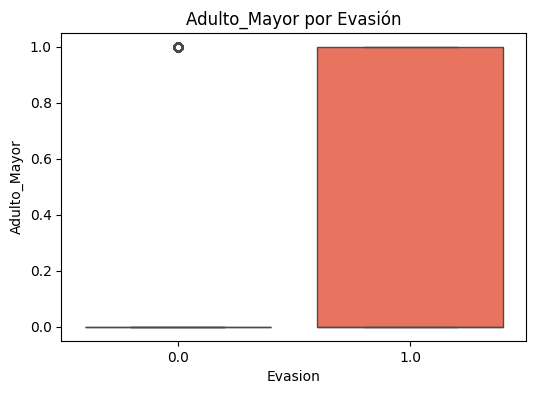

Adulto_Mayor: Mann-Whitney p = 0.000000
----------------------------------------


/tmp/ipython-input-436850046.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['Evasion'].isin([0,1])], x='Evasion', y=n, palette=['steelblue','tomato'])


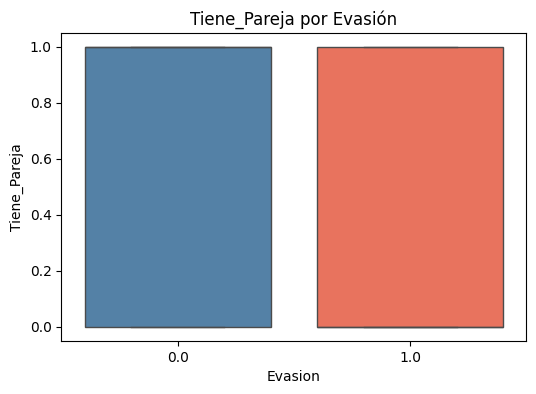

Tiene_Pareja: Mann-Whitney p = 0.000000
----------------------------------------


/tmp/ipython-input-436850046.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['Evasion'].isin([0,1])], x='Evasion', y=n, palette=['steelblue','tomato'])


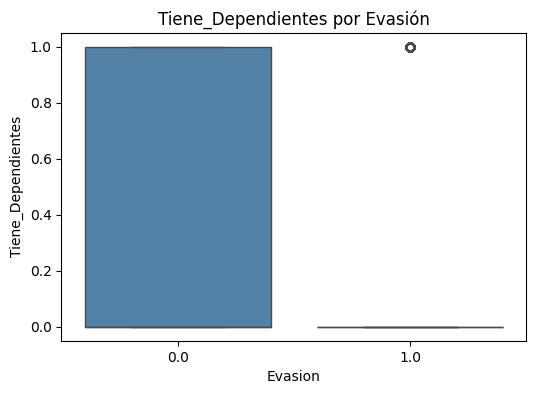

Tiene_Dependientes: Mann-Whitney p = 0.000000
----------------------------------------


/tmp/ipython-input-436850046.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['Evasion'].isin([0,1])], x='Evasion', y=n, palette=['steelblue','tomato'])


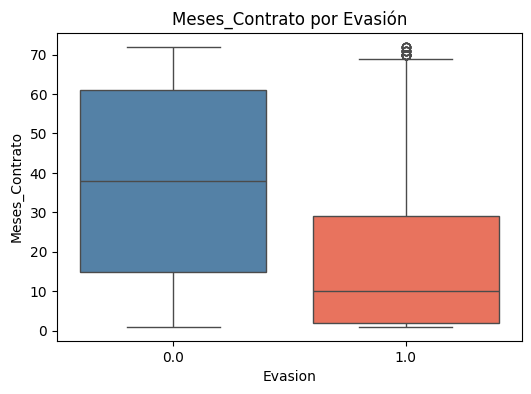

Meses_Contrato: Mann-Whitney p = 0.000000
----------------------------------------


/tmp/ipython-input-436850046.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['Evasion'].isin([0,1])], x='Evasion', y=n, palette=['steelblue','tomato'])


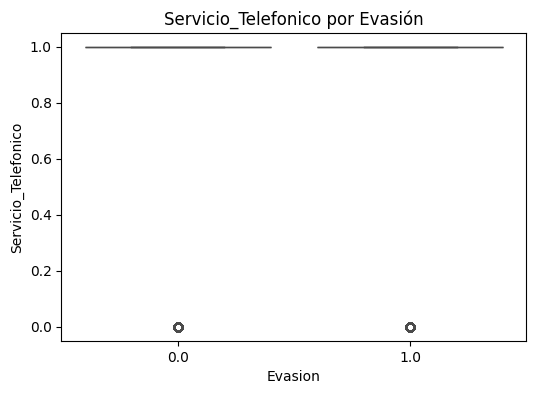

Servicio_Telefonico: Mann-Whitney p = 0.326927

/tmp/ipython-input-436850046.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['Evasion'].isin([0,1])], x='Evasion', y=n, palette=['steelblue','tomato'])



----------------------------------------


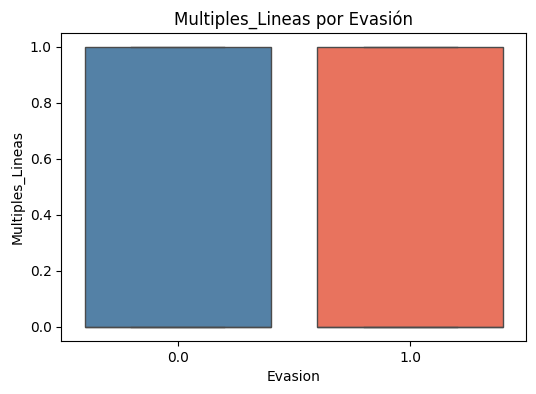

Multiples_Lineas: Mann-Whitney p = 0.000789
----------------------------------------


/tmp/ipython-input-436850046.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['Evasion'].isin([0,1])], x='Evasion', y=n, palette=['steelblue','tomato'])


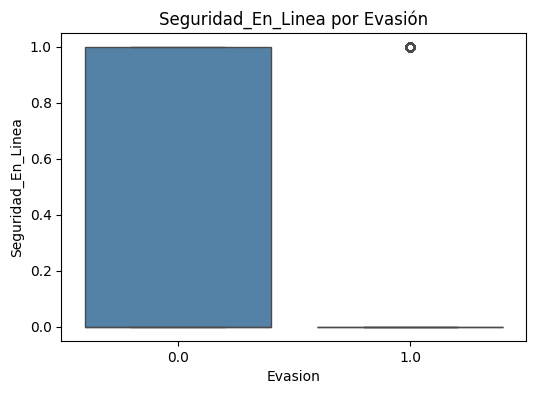

Seguridad_En_Linea: Mann-Whitney p = 0.000000
----------------------------------------


/tmp/ipython-input-436850046.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['Evasion'].isin([0,1])], x='Evasion', y=n, palette=['steelblue','tomato'])


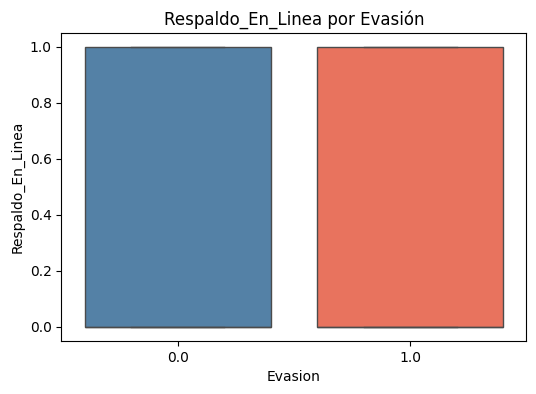

Respaldo_En_Linea: Mann-Whitney p = 0.000000
----------------------------------------


/tmp/ipython-input-436850046.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['Evasion'].isin([0,1])], x='Evasion', y=n, palette=['steelblue','tomato'])


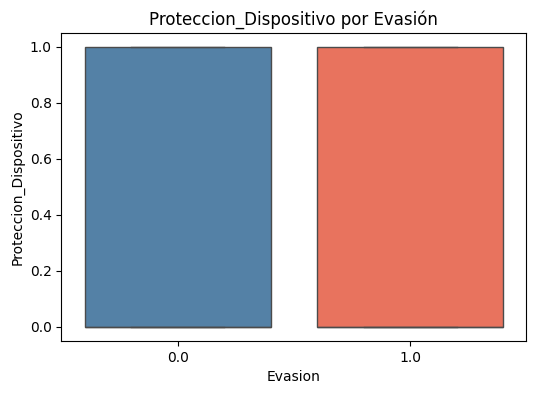

Proteccion_Dispositivo: Mann-Whitney p = 0.000000
----------------------------------------


/tmp/ipython-input-436850046.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['Evasion'].isin([0,1])], x='Evasion', y=n, palette=['steelblue','tomato'])


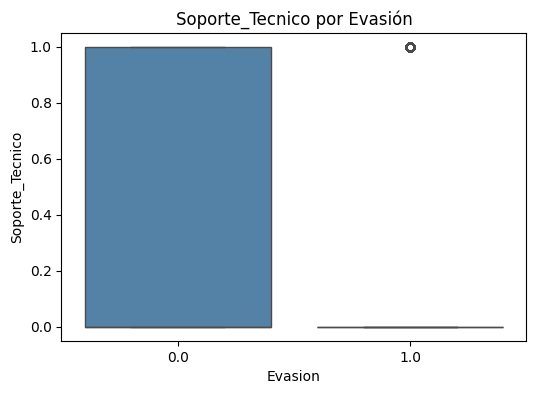

Soporte_Tecnico: Mann-Whitney p = 0.000000
----------------------------------------


/tmp/ipython-input-436850046.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['Evasion'].isin([0,1])], x='Evasion', y=n, palette=['steelblue','tomato'])


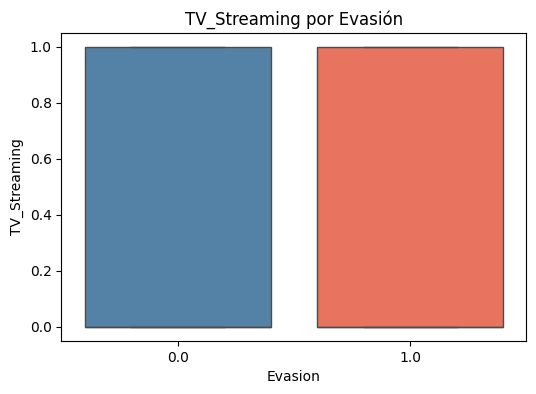

TV_Streaming: Mann-Whitney p = 0.000000
----------------------------------------


/tmp/ipython-input-436850046.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['Evasion'].isin([0,1])], x='Evasion', y=n, palette=['steelblue','tomato'])


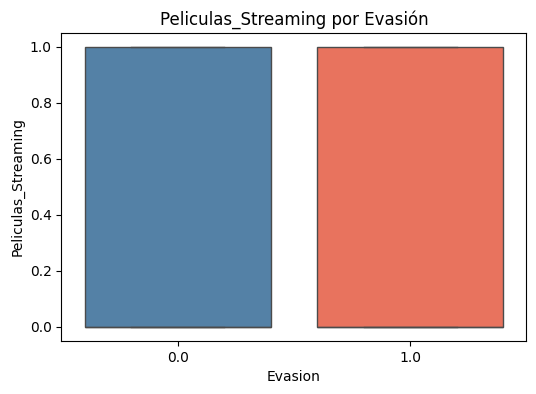

Peliculas_Streaming: Mann-Whitney p = 0.000000
----------------------------------------


/tmp/ipython-input-436850046.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['Evasion'].isin([0,1])], x='Evasion', y=n, palette=['steelblue','tomato'])


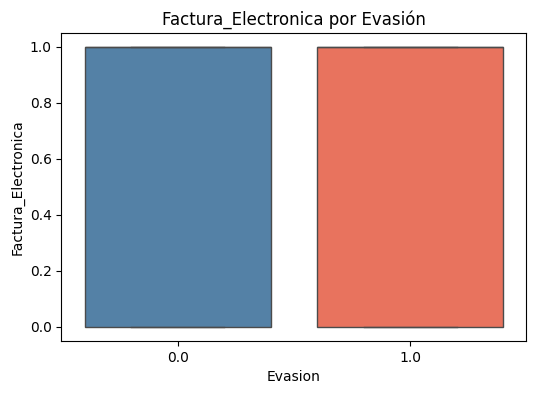

Factura_Electronica: Mann-Whitney p = 0.000000
----------------------------------------


/tmp/ipython-input-436850046.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['Evasion'].isin([0,1])], x='Evasion', y=n, palette=['steelblue','tomato'])


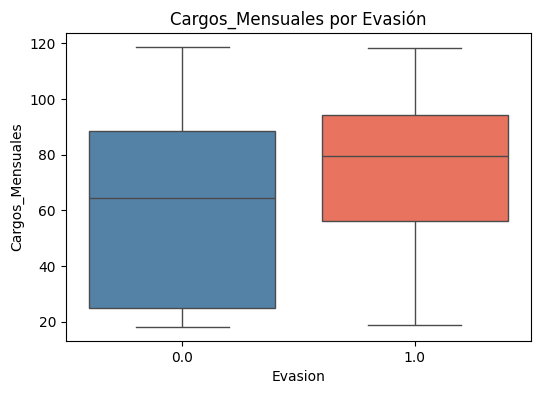

Cargos_Mensuales: Mann-Whitney p = 0.000000
----------------------------------------


/tmp/ipython-input-436850046.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['Evasion'].isin([0,1])], x='Evasion', y=n, palette=['steelblue','tomato'])


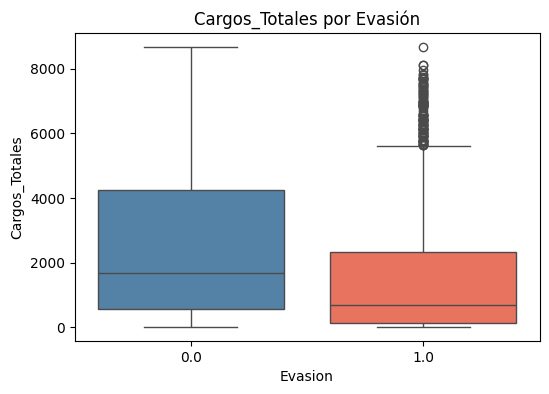

Cargos_Totales: Mann-Whitney p = 0.000000
----------------------------------------


/tmp/ipython-input-436850046.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['Evasion'].isin([0,1])], x='Evasion', y=n, palette=['steelblue','tomato'])


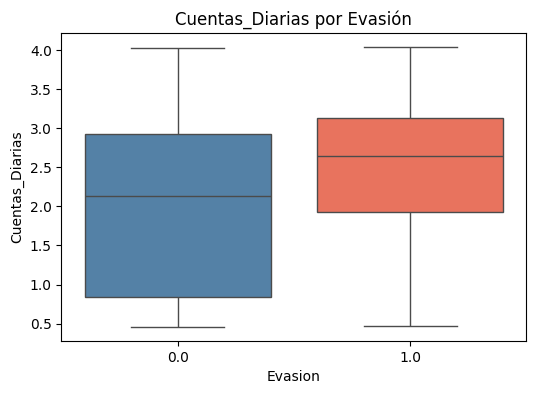

Cuentas_Diarias: Mann-Whitney p = 0.000000
----------------------------------------


In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, mannwhitneyu
from statsmodels.stats.outliers_influence import variance_inflation_factor

# --- Configuración: lista de columnas categóricas y numéricas
cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()
if 'Evasion' in cat_cols:
    cat_cols.remove('Evasion')

num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
if 'Evasion' in num_cols:
    num_cols.remove('Evasion')

# --- 1) Categóricas: churn rate por nivel + chi2 ---
print("=== Análisis categórico: churn rate y chi2 ===\n")
for c in cat_cols:
    print(f"Variable: {c}")
    ct = pd.crosstab(df[c].fillna('NA'), df['Evasion'])
    display(ct)
    # churn rate por nivel (porcentaje de 1s)
    churn_rate = (ct.apply(lambda row: row.get(1,0) / row.sum(), axis=1)).sort_values(ascending=False)
    print("Tasa de churn por nivel (ordenada):")
    display((churn_rate*100).round(2))
    # chi2
    try:
        chi2, p, dof, exp = chi2_contingency(ct)
        print("Chi2 p-value:", round(p,6))
    except Exception as e:
        print("Chi2 error:", e)
    print("-"*60)

# --- 2) Numéricas: boxplots y Mann-Whitney test ---
print("\n=== Análisis numérico: boxplots y Mann-Whitney ===\n")
for n in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df[df['Evasion'].isin([0,1])], x='Evasion', y=n, palette=['steelblue','tomato'])
    plt.title(f"{n} por Evasión")
    plt.show()
    # Mann-Whitney test (no paramétrico)
    grp0 = df[df['Evasion']==0][n].dropna()
    grp1 = df[df['Evasion']==1][n].dropna()
    if len(grp0)>0 and len(grp1)>0:
        stat, p = mannwhitneyu(grp0, grp1, alternative='two-sided')
        print(f"{n}: Mann-Whitney p = {p:.6f}")
    else:
        print(f"{n}: datos insuficientes para test")
    print("-"*40)


##Calculo de VIF de la variables##

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
import pandas as pd

# 1. Excluir la variable target
X_vif = df.drop(columns=['Evasion']).copy()

# 2. One-hot encoding para columnas tipo object
X_vif = pd.get_dummies(X_vif, drop_first=True)

# 3. Asegurarnos de que todo es numérico y sin NaN
X_vif = X_vif.apply(pd.to_numeric, errors='coerce')
X_vif.replace([np.inf, -np.inf], np.nan, inplace=True)
X_vif.dropna(axis=1, inplace=True)

# 4. Convertir a float explícitamente
X_vif = X_vif.astype(float)

# 5. Calcular VIF
vif_df = pd.DataFrame()
vif_df["feature"] = X_vif.columns
vif_df["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# 6. Ordenar por VIF descendente
vif_df = vif_df.sort_values(by="VIF", ascending=False).reset_index(drop=True)

print(vif_df)

                          feature          VIF
0                Cargos_Mensuales  1081.698885
1                 Cuentas_Diarias   752.389299
2             Servicio_Telefonico    54.180012
3   Servicio_Internet_Fiber optic    21.513029
4                  Cargos_Totales    21.507205
5                  Meses_Contrato    20.333722
6            Servicio_Internet_No     8.763988
7           Tipo_Contrato_Mensual     7.836435
8             Peliculas_Streaming     5.908031
9                    TV_Streaming     5.749948
10           Metodo_Pago_Cheque-E     3.299364
11         Proteccion_Dispositivo     3.254423
12                Soporte_Tecnico     3.086440
13              Respaldo_En_Linea     3.071828
14               Multiples_Lineas     3.009738
15            Factura_Electronica     2.975258
16             Seguridad_En_Linea     2.913756
17                   Tiene_Pareja     2.818978
18             Metodo_Pago_Transf     2.305252
19       Metodo_Pago_Tarj-de-Créd     2.267676
20           

##Eliminar variables con multicolinealidad para evitar que el modelo reciba información redundante.##

In [16]:
# Lista de columnas a eliminar
columnas_a_eliminar = [
    'Cargos_Totales',
    'Cuentas_Diarias',
    'Servicio_Internet_Fiber optic',
    'Meses_Contrato',
    'Servicio_Telefonico'
]

# Eliminación del DataFrame
df_modelo = df.drop(columns=columnas_a_eliminar, errors='ignore')

print("Columnas eliminadas:", columnas_a_eliminar)
print("Shape final del DataFrame:", df_modelo.shape)

Columnas eliminadas: ['Cargos_Totales', 'Cuentas_Diarias', 'Servicio_Internet_Fiber optic', 'Meses_Contrato', 'Servicio_Telefonico']
Shape final del DataFrame: (7256, 17)


##Chequear las variables con VIF alto para evitar la multicolinealidad##

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# 1. Seleccionar columnas numéricas
X_vif = df_modelo.select_dtypes(include=['float64', 'int64'])

# 2. Reemplazar infinitos por NaN y luego eliminar filas con NaN
X_vif = X_vif.replace([np.inf, -np.inf], np.nan).dropna()

# 3. Calcular VIF
vif_data = pd.DataFrame()
vif_data['feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# 4. Mostrar resultados
print(vif_data.sort_values(by='VIF', ascending=False))

                   feature        VIF
12        Cargos_Mensuales  11.545096
11     Factura_Electronica   2.815785
10     Peliculas_Streaming   2.795241
9             TV_Streaming   2.759031
2             Tiene_Pareja   2.538317
4         Multiples_Lineas   2.327581
7   Proteccion_Dispositivo   2.190214
6        Respaldo_En_Linea   2.020250
8          Soporte_Tecnico   1.895453
3       Tiene_Dependientes   1.843960
5       Seguridad_En_Linea   1.801859
0                  Evasion   1.676474
1             Adulto_Mayor   1.356461


# Codificación de variables categóricas.#

In [18]:
# 1. Identificar columnas categóricas
categoricas = df_modelo.select_dtypes(include=['object']).columns.tolist()
print("Columnas categóricas:", categoricas)

# 2. One-Hot Encoding con drop_first para evitar multicolinealidad perfecta
df_modelo_encoded = pd.get_dummies(df_modelo, columns=categoricas, drop_first=True)

# 3. Verificar el nuevo DataFrame
print("Shape antes:", df_modelo.shape)
print("Shape después:", df_modelo_encoded.shape)
df_modelo_encoded.head()

Columnas categóricas: ['Genero', 'Servicio_Internet', 'Tipo_Contrato', 'Metodo_Pago']
Shape antes: (7256, 17)
Shape después: (7256, 21)


,Evasion,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Multiples_Lineas,Seguridad_En_Linea,Respaldo_En_Linea,Proteccion_Dispositivo,Soporte_Tecnico,TV_Streaming,...,Factura_Electronica,Cargos_Mensuales,Genero_Masculino,Servicio_Internet_Fiber optic,Servicio_Internet_No,Tipo_Contrato_Mensual,Tipo_Contrato_Un Año,Metodo_Pago_Cheque-E,Metodo_Pago_Tarj-de-Créd,Metodo_Pago_Transf
0,0.0,0,1,1,0,0,1,0,1,1,...,1,65.6,False,False,False,False,True,False,False,False
1,0.0,0,0,0,1,0,0,0,0,0,...,0,59.9,True,False,False,True,False,False,False,False
2,1.0,0,0,0,0,0,0,1,0,0,...,1,73.9,True,True,False,True,False,True,False,False
3,1.0,1,1,0,0,0,1,1,0,1,...,1,98.0,True,True,False,True,False,True,False,False
4,1.0,1,1,0,0,0,0,0,1,1,...,1,83.9,False,True,False,True,False,False,False,False


##Verificar que la Variable Evasion no sufrio modificaciones##

In [19]:
# 1. Confirmar que existe la columna
print("Evasion en columnas:", 'Evasion' in df_modelo_encoded.columns)

# 2. Tipo de dato
print("Tipo de dato:", df_modelo_encoded['Evasion'].dtype)

# 3. Valores únicos
print("Valores únicos:", df_modelo_encoded['Evasion'].unique())

# 4. Conteo por clase
print("Conteo por clase:\n", df_modelo_encoded['Evasion'].value_counts())

# 5. Verificar NaN
print("¿Tiene NaN?:", df_modelo_encoded['Evasion'].isna().sum())


Evasion en columnas: True
Tipo de dato: float64
Valores únicos: [ 0.  1. nan]
Conteo por clase:
 Evasion
0.0    5163
1.0    1869
Name: count, dtype: int64
¿Tiene NaN?: 224


##Eliminacion de NaN en Evasión porque no contribuyen al entrenamiento del modelo##

In [20]:
# Eliminar filas donde Evasion es NaN
df_modelo_encoded = df_modelo_encoded.dropna(subset=['Evasion'])

# Confirmar eliminación
print(df_modelo_encoded['Evasion'].isna().sum())
print(df_modelo_encoded['Evasion'].value_counts())

0
Evasion
0.0    5163
1.0    1869
Name: count, dtype: int64


##Convertir los False y True en 0 y 1##

In [21]:
# Convertir True/False a 0/1
df_modelo_encoded = df_modelo_encoded.astype(int)

# Verificar
df_modelo_encoded.head()

,Evasion,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Multiples_Lineas,Seguridad_En_Linea,Respaldo_En_Linea,Proteccion_Dispositivo,Soporte_Tecnico,TV_Streaming,...,Factura_Electronica,Cargos_Mensuales,Genero_Masculino,Servicio_Internet_Fiber optic,Servicio_Internet_No,Tipo_Contrato_Mensual,Tipo_Contrato_Un Año,Metodo_Pago_Cheque-E,Metodo_Pago_Tarj-de-Créd,Metodo_Pago_Transf
0,0,0,1,1,0,0,1,0,1,1,...,1,65,0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,59,1,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0,...,1,73,1,1,0,1,0,1,0,0
3,1,1,1,0,0,0,1,1,0,1,...,1,98,1,1,0,1,0,1,0,0
4,1,1,1,0,0,0,0,0,1,1,...,1,83,0,1,0,1,0,0,0,0


#Verificación del balanceo de clases#

##Decidir si aplicamos oversampling, undersampling o SMOTE antes de entrenar.##

Conteo de clases:
 Evasion
0    5163
1    1869
Name: count, dtype: int64

Proporción de clases:
Evasion
0    0.734215
1    0.265785
Name: count, dtype: float64


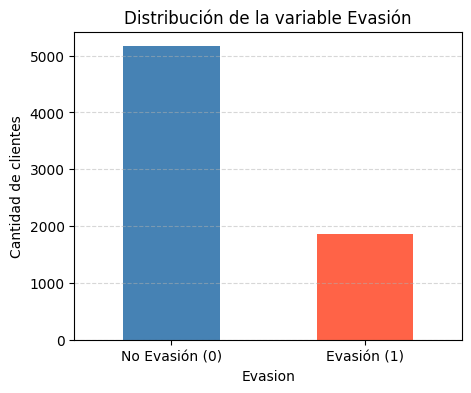

In [22]:
# Distribución de la variable objetivo
import matplotlib.pyplot as plt

conteo_clases = df_modelo_encoded['Evasion'].value_counts()

print("Conteo de clases:\n", conteo_clases)
print("\nProporción de clases:")
print(conteo_clases / conteo_clases.sum())

# Gráfico
plt.figure(figsize=(5,4))
conteo_clases.plot(kind='bar', color=['steelblue', 'tomato'])
plt.title('Distribución de la variable Evasión')
plt.xticks([0, 1], ['No Evasión (0)', 'Evasión (1)'], rotation=0)
plt.ylabel('Cantidad de clientes')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

## Con esos valores vemos que el dataset está desbalanceado:

    0 (No Evasión) → 73.4%

    1 (Evasión) → 26.6%

En Machine Learning, este tipo de desbalance puede hacer que los modelos predigan mayormente la clase mayoritaria (0) y tengan peor desempeño para detectar la evasión (1), que es la que nos interesa más.

Para mejorar el balanceo es lo recomendable aplicar alguna técnica de balanceo antes de entrenar el modelo. Por ejemplo:

    1-Oversampling (duplicar datos de la clase minoritaria) — RandomOverSampler

    2-SMOTE (crear datos sintéticos para la clase minoritaria) — mejor si los datos son variados

    3-Undersampling (reducir la clase mayoritaria) — menos recomendable porque se pierde información ##

##Usaremos SMOTE para balancear el modelo##

In [23]:
from imblearn.over_sampling import SMOTE


# Separar X (features) y y (target)
X = df_modelo_encoded.drop(columns=['Evasion'])
y = df_modelo_encoded['Evasion']

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Verificar el nuevo balance
print("Conteo de clases después de SMOTE:")
print(y_res.value_counts(normalize=False))
print("\nProporción de clases:")
print(y_res.value_counts(normalize=True))

Conteo de clases después de SMOTE:
Evasion
0    5163
1    5163
Name: count, dtype: int64

Proporción de clases:
Evasion
0    0.5
1    0.5
Name: proportion, dtype: float64


#Metodo de separacion de datos#

## Kfold-con un 70% para entrenamiento/validación y 30% para prueba.##
Lo que hacemos es dividir los datos en test y training. Luego a training se los dividio en train y validacion. Despues se normaliza, para modelos sensibles y se deja otros datos para los modelo no sensilbles.

In [24]:
from sklearn.model_selection import train_test_split, KFold

# 1. Separar X e y
X = df_modelo_encoded.drop(columns=['Evasion'])
y = df_modelo_encoded['Evasion']

# 2. Train/Test split (70% - 30%)
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

# 3. Del Train, separar en Train y Valid (80% - 20% del train original)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full,
    test_size=0.2,
    random_state=42,
    stratify=y_train_full
)

# 4. Configurar KFold (sobre el train)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 5. Mostrar tamaños
print("📏 Tamaños de los conjuntos:")
print(f"X_train: {X_train.shape} → {len(X_train)} filas")
print(f"X_val:   {X_val.shape} → {len(X_val)} filas")
print(f"X_test:  {X_test.shape} → {len(X_test)} filas")

print("\n📂 Ejemplo de divisiones KFold (sobre X_train):")
for fold, (train_idx, val_idx) in enumerate(kf.split(X_train), 1):
    print(f"Fold {fold} → Train: {len(train_idx)}, Val: {len(val_idx)}")

📏 Tamaños de los conjuntos:
X_train: (3937, 20) → 3937 filas
X_val:   (985, 20) → 985 filas
X_test:  (2110, 20) → 2110 filas

📂 Ejemplo de divisiones KFold (sobre X_train):
Fold 1 → Train: 3149, Val: 788
Fold 2 → Train: 3149, Val: 788
Fold 3 → Train: 3150, Val: 787
Fold 4 → Train: 3150, Val: 787
Fold 5 → Train: 3150, Val: 787


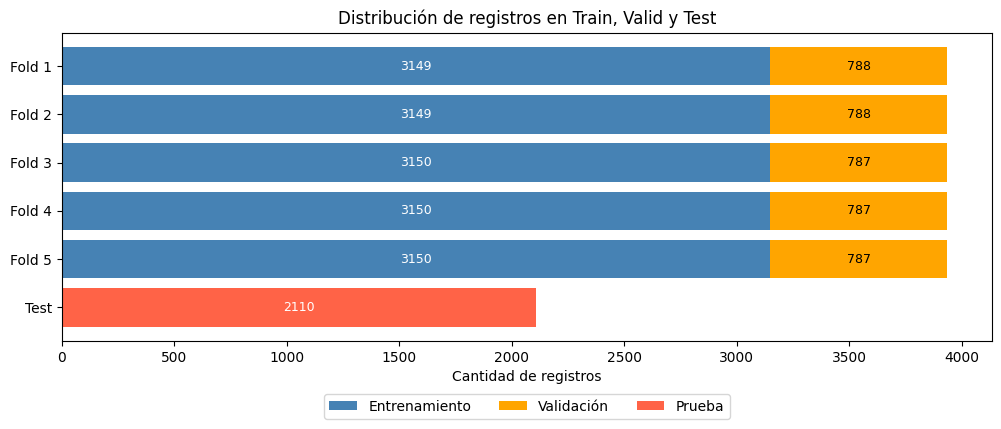

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Total de registros
n_total = len(X)
n_test_total = len(X_test)

# Crear figura
plt.figure(figsize=(12, 4))

# Iterar folds
for fold, (train_idx, val_idx) in enumerate(kf.split(X_train), 1):
    # Posiciones absolutas dentro de X_train
    train_size = len(train_idx)
    val_size = len(val_idx)

    # Dibujar barra de train (azul)
    plt.barh(y=fold, width=train_size, left=0, color='steelblue', label='Entrenamiento' if fold == 1 else "")

    # Dibujar barra de val (naranja)
    plt.barh(y=fold, width=val_size, left=train_size, color='orange', label='Validación' if fold == 1 else "")

    # Etiquetas con cantidad
    plt.text(train_size/2, fold, f"{train_size}", va='center', ha='center', color='white', fontsize=9)
    plt.text(train_size + val_size/2, fold, f"{val_size}", va='center', ha='center', color='black', fontsize=9)

# Agregar barra de test (roja) en la última línea
plt.barh(y=6, width=n_test_total, left=0, color='tomato', label='Prueba')
plt.text(n_test_total/2, 6, f"{n_test_total}", va='center', ha='center', color='white', fontsize=9)

# Ajustes del gráfico
plt.yticks(range(1, 7), [f"Fold {i}" for i in range(1, 6)] + ["Test"])
plt.xlabel("Cantidad de registros")
plt.title("Distribución de registros en Train, Valid y Test")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.gca().invert_yaxis()
plt.show()

#Normalizacion para modelos sensibles a escala-Regresión Logística-KNN-SVM-Redes Neuronales#

In [26]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# --- Normalización solo para modelos sensibles a escala ---
scaler = StandardScaler()

# Normalizamos SOLO las variables numéricas
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Convertir a DataFrame manteniendo nombres de columnas
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val.columns, index=X_val.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("✅ Normalización completada para modelos sensibles a escala.")

✅ Normalización completada para modelos sensibles a escala.


##Verificacion de booleanos que puedan trabar el entrenamiento del modelo##

In [27]:
X_train.dtypes.value_counts()

,count
int64,20


#Modelo 1: Regresión Logística #

In [28]:
# === A) Preparar train con SMOTE (SOLO TRAIN) ===
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

# Para Regresión Logística usamos los conjuntos escalados
X_train_scaled_sm, y_train_sm = smote.fit_resample(X_train_scaled, y_train)

print("Tamaños tras SMOTE (solo train, escalado):", X_train_scaled_sm.shape, y_train_sm.shape)

Tamaños tras SMOTE (solo train, escalado): (5782, 20) (5782,)


In [ ]:
# === B) Entrenar Regresión Logística ===
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(max_iter=2000, solver='lbfgs', random_state=42, n_jobs=-1)
log_clf.fit(X_train_scaled_sm, y_train_sm)

## Funcion Evaluacion: Matriz confusion-Curva Rock-Curva de presicion-Recall y Metricas##

In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, roc_curve, auc,
    precision_recall_curve, average_precision_score
)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Lista global para acumular resultados
resultados_modelos = []

def evaluar_modelo_guardar(y_true, y_pred, y_pred_proba, nombre_modelo="Modelo", mostrar_graficos=True):
    """
    Evalúa un modelo, muestra gráficos y guarda métricas en una lista global.
    """
    # ===== 1️⃣ Calcular métricas =====
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred_proba)
    ap_score = average_precision_score(y_true, y_pred_proba)

    # Guardar métricas en lista global
    resultados_modelos.append({
        "Modelo": nombre_modelo,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC-AUC": roc_auc,
        "Average Precision": ap_score
    })

    # ===== 2️⃣ Mostrar gráficos si se solicita =====
    if mostrar_graficos:
        fig, axes = plt.subplots(1, 3, figsize=(15, 4))

        # Matriz de confusión personalizada
        cm = confusion_matrix(y_true, y_pred)
        labels = [["TN\n"+str(cm[0,0]), "FP\n"+str(cm[0,1])],
                  ["FN\n"+str(cm[1,0]), "TP\n"+str(cm[1,1])]]
        colors = [["#4CAF50", "#FF9800"], ["#2196F3", "#F44336"]]

        for i in range(2):
            for j in range(2):
                axes[0].add_patch(plt.Rectangle((j, i), 1, 1, fill=True, color=colors[i][j], alpha=0.8))
                axes[0].text(j + 0.5, i + 0.5, labels[i][j],
                             ha="center", va="center", fontsize=12, fontweight="bold", color="white")
        axes[0].set_xlim(0, 2)
        axes[0].set_ylim(0, 2)
        axes[0].set_xticks([0.5, 1.5])
        axes[0].set_yticks([0.5, 1.5])
        axes[0].set_xticklabels(['Predicho: No (0)', 'Predicho: Sí (1)'])
        axes[0].set_yticklabels(['Real: No (0)', 'Real: Sí (1)'])
        axes[0].set_title("Matriz de Confusión")
        axes[0].invert_yaxis()
        axes[0].set_aspect('equal')

        # Curva ROC
        fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
        axes[1].plot(fpr, tpr, color='darkorange', lw=2, label=f"AUC = {roc_auc:.2f}")
        axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Línea aleatoria")
        axes[1].set_xlim([0.0, 1.0])
        axes[1].set_ylim([0.0, 1.05])
        axes[1].set_xlabel("Falsos Positivos (FPR)")
        axes[1].set_ylabel("Verdaderos Positivos (TPR)")
        axes[1].set_title("Curva ROC")
        axes[1].legend(loc="lower right")

        # Curva Precisión–Recall
        precision_vals, recall_vals, _ = precision_recall_curve(y_true, y_pred_proba)
        axes[2].plot(recall_vals, precision_vals, color='blue', lw=2, label=f"AP = {ap_score:.2f}")
        axes[2].set_xlabel("Recall")
        axes[2].set_ylabel("Precision")
        axes[2].set_title("Curva Precisión–Recall")
        axes[2].legend(loc="best")
        axes[2].grid(True)

        plt.suptitle(f"Evaluación — {nombre_modelo}", fontsize=14)
        plt.tight_layout()
        plt.show()

    return pd.DataFrame(resultados_modelos)

##Evaluación en Validación- Modelo Regresion Logística##

In [ ]:
y_pred_val = log_clf.predict(X_val_scaled)
y_pred_proba_val = log_clf.predict_proba(X_val_scaled)[:, 1]

df_resultados = evaluar_modelo_guardar(y_val, y_pred_val, y_pred_proba_val, nombre_modelo="Modelo-Regresión Logística-Validación")

##Evaluación en test-Modelo-Regresión Logística##

In [ ]:
y_pred_test = log_clf.predict(X_test_scaled)
y_pred_proba_test = log_clf.predict_proba(X_test_scaled)[:, 1]

df_resultados = evaluar_modelo_guardar(y_test, y_pred_test, y_pred_proba_test, nombre_modelo="Modelo-Regresión Logística-Test")

In [ ]:
df_resultados = pd.DataFrame(resultados_modelos)
df_resultados.sort_values(by="ROC-AUC", ascending=False)

#Modelo 2: Arbol de Decision-DecisionTreeClassifier #

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# 1. Crear y entrenar modelo
modelo_dt = DecisionTreeClassifier(
    max_depth=5,
    random_state=42
)
modelo_dt.fit(X_train_scaled, y_train)

##Evaluación en Validación-Modelo-DecisionTree##

In [ ]:
# 2. Evaluar en Validación
y_pred_val = modelo_dt.predict(X_val_scaled)
y_pred_proba_val = modelo_dt.predict_proba(X_val_scaled)[:, 1]
df_resultados = evaluar_modelo_guardar(y_val, y_pred_val, y_pred_proba_val, nombre_modelo="Modelo-DecisionTree-Validación")

##Evaluación en test-Modelo-DecisionTree##

In [ ]:
# 3. Evaluar en Test
y_pred_test = modelo_dt.predict(X_test_scaled)
y_pred_proba_test = modelo_dt.predict_proba(X_test_scaled)[:, 1]
df_resultados = evaluar_modelo_guardar(y_test, y_pred_test, y_pred_proba_test, nombre_modelo="Modelo-DecisionTree-Test")

## Metricas Comparativas##

In [ ]:
df_resultados = pd.DataFrame(resultados_modelos)
df_resultados.sort_values(by="ROC-AUC", ascending=False)

#Modelo 3: Random Forest#

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 1. Crear y entrenar modelo
modelo_rf = RandomForestClassifier(
    n_estimators=200,   # cantidad de árboles
    max_depth=8,        # profundidad máxima
    random_state=42,
    n_jobs=-1           # usar todos los núcleos
)
modelo_rf.fit(X_train_scaled, y_train)

##Evaluación en Validación-Modelo-RandomForest##

In [ ]:
# 2. Evaluar en Validación
y_pred_val = modelo_rf.predict(X_val_scaled)
y_pred_proba_val = modelo_rf.predict_proba(X_val_scaled)[:, 1]
df_resultados = evaluar_modelo_guardar(
    y_val, y_pred_val, y_pred_proba_val,
    nombre_modelo="Modelo-RandomForest-Validación"
)

##Evaluación en test-Modelo-RandomForest##

In [ ]:
# 3. Evaluar en Test
y_pred_test = modelo_rf.predict(X_test_scaled)
y_pred_proba_test = modelo_rf.predict_proba(X_test_scaled)[:, 1]
df_resultados = evaluar_modelo_guardar(
    y_test, y_pred_test, y_pred_proba_test,
    nombre_modelo="Modelo-RandomForest-Test"
)

## Metricas Comparativas##

In [ ]:
df_resultados = pd.DataFrame(resultados_modelos)
df_resultados.sort_values(by="ROC-AUC", ascending=False)

#Modelo 4: XGBoost#

In [ ]:
from xgboost import XGBClassifier

# 1. Crear y entrenar modelo
modelo_xgb = XGBClassifier(
    n_estimators=300,       # número de árboles
    max_depth=6,           # profundidad máxima de cada árbol
    learning_rate=0.1,     # tasa de aprendizaje
    subsample=0.8,         # proporción de datos para cada árbol
    colsample_bytree=0.8,  # proporción de características por árbol
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'  # evita warnings
)
modelo_xgb.fit(X_train_scaled, y_train)

##Evaluación en Validación-Modelo-XGBoost##

In [ ]:
# 2. Evaluar en Validación
y_pred_val = modelo_xgb.predict(X_val_scaled)
y_pred_proba_val = modelo_xgb.predict_proba(X_val_scaled)[:, 1]
df_resultados = evaluar_modelo_guardar(
    y_val, y_pred_val, y_pred_proba_val,
    nombre_modelo="Modelo-XGBoost-Validación"
)

##Evaluación en test-Modelo-XGBoost##

In [ ]:
# 3. Evaluar en Test
y_pred_test = modelo_xgb.predict(X_test_scaled)
y_pred_proba_test = modelo_xgb.predict_proba(X_test_scaled)[:, 1]
df_resultados = evaluar_modelo_guardar(
    y_test, y_pred_test, y_pred_proba_test,
    nombre_modelo="Modelo-XGBoost-Test"
)

## Metricas Comparativas##

In [ ]:
df_resultados = pd.DataFrame(resultados_modelos)
df_resultados.sort_values(by="ROC-AUC", ascending=False)

##Comparación por métricas claves##

| Modelo                  | Recall Test | ROC-AUC Test | Comentario                                                                              |
| ----------------------- | ----------- | ------------ | --------------------------------------------------------------------------------------- |
| **Regresión Logística** | **0.800**   | **0.823**    | Máxima sensibilidad (detecta más clientes que se van) y excelente separación de clases. |
| Random Forest           | 0.415       | 0.816        | Buena precisión pero pierde muchos clientes que sí cancelan.                            |
| Decision Tree           | 0.433       | 0.805        | Similar a Random Forest pero tiene mas baja metrica en ROC-AUC.                                      |
| XGBoost                 | 0.446       | 0.772        | Menor discriminación global y recall más bajo.                                          |


#Interpretacion del Analisis#

El objetivo del modelo es detectar clientes con alta probabilidad de cancelar, para luego poder tomar acciones preventivas.
En este tipo de problema, Recall y ROC-AUC son más importantes que la precisión pura, porque:

Si el modelo predice que un cliente no se va y se equivoca (falso negativo), perdemos la oportunidad de retenerlo.

Podemos tolerar falsos positivos (clientes que no se iban pero etiquetamos como riesgo), porque la acción comercial preventiva no es tan costosa en comparación con perder al cliente.

Tomando este criterio:

El mejor modelo que se adapta a esta problematica es Regresión Logística ya que tiene el Recall más alto (0.80 en Test), con ROC-AUC de 0.823, lo que indica muy buena capacidad de clasificación global.

Además, mantiene un F1-score aceptable (0.608) que muestra buen equilibrio entre detectar y predecir correctamente.

Random Forest, Decision Tree y XGBoost tienen recall mucho más bajo (0.41–0.45), por lo que dejarían escapar una gran proporción de clientes que realmente cancelarían.

##Graficos para mejorar la interpretacion de las metricas de los modelos##

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Datos de métricas (solo Test)
data = {
    'Modelo': ['Regresión Logística', 'Random Forest', 'Decision Tree', 'XGBoost'],
    'Accuracy': [0.725592, 0.776303, 0.761137, 0.745024],
    'Precision': [0.490175, 0.618037, 0.566434, 0.524109],
    'Recall': [0.800357, 0.415330, 0.433155, 0.445633],
    'F1-Score': [0.607989, 0.496802, 0.490909, 0.481696],
    'ROC-AUC': [0.822541, 0.816401, 0.804923, 0.772421],
    'Average Precision': [0.582635, 0.569292, 0.530139, 0.503882]
}

# Convertir a DataFrame
df_metrics = pd.DataFrame(data)

# Definir colores para cada modelo
colors = ['steelblue', 'seagreen', 'darkorange', 'crimson']

# Graficar cada métrica como grupo de barras
df_metrics.set_index('Modelo').plot(
    kind='bar',
    figsize=(12, 6),
    color=colors,
    alpha=0.85
)

plt.title("Comparación de métricas en Test para los 4 modelos", fontsize=14)
plt.ylabel("Valor métrica")
plt.xticks(rotation=45, ha='right')
plt.legend(loc='lower right', bbox_to_anchor=(1.15, 0.0))
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


#Guardar el modelo para realizar predicciones#

In [ ]:
import joblib

# Guardar el modelo de Regresión Logística
joblib.dump(log_clf, "modelo_evasion_clientes.pkl")

print("✅ Modelo guardado como 'modelo_evasion_clientes.pkl'")


##Cargar el modelo y hacer alguna predicciones##

In [ ]:
# Cargar el modelo
modelo_cargado = joblib.load("modelo_evasion_clientes.pkl")

# Ejemplo de predicción
predicciones = modelo_cargado.predict(X_test_scaled)

#Muestra las primeras 10 predicciones
print(predicciones[:10])